# Welcome to the CCTR691 NLP Lab\! 🎯

## 1\. Important: Save Your Own Copy\!

Before you do anything else, you **must** save your own copy of this notebook to your Google Drive.

➡️ Go to **File \> Save a copy in Drive**.

This creates a new file that is yours to edit and save. If you work on this original notebook, your changes **will not** be saved.

-----

## 2\. How to Run This Notebook

  * This document is an interactive notebook. It contains text (like this) and live code cells.
  * To run a code cell, click inside it and press **Shift + Enter** or click the **Play button** (▶️) that appears to its left.
  * Run the cells in order from top to bottom. Later cells often depend on variables or functions defined in earlier cells.

-----

## 3\. Using the Colab AI Assistant (Gemini) 💡

This notebook includes an AI assistant to help you learn. You can access it using the **AI icon** (often a sparkle ✨ or the Gemini logo) in the top-right toolbar.

**How to use it:**

  * **Generate Code:** You can ask it to write code for a specific task (e.g., "Help me write a function to plot this data using matplotlib").
  * **Explain Code:** If you're confused by a code block, select the cell and ask the AI to "Explain this code."
  * **Debug Errors:** You can paste an error message and ask what it means or how to fix it.

**Our Policy on AI:**

  * **Treat it as a tutor, not a replacement for thinking.** The goal is for *you* to understand the material. Use the AI to get "unstuck" or see a different approach, not to do the assignment for you.
  * **Verify, Don't Trust.** The AI is a powerful tool, but it can make mistakes or "hallucinate." Always test its code and double-check its explanations.
  * **You are Responsible.** You are ultimately responsible for the code you submit and for understanding *why* it works.

-----

## 4\. Lab Completion and Submission 🚀

Your goal for this lab is to complete this notebook by running all code, generating all images, and answering the questions.

**Follow these steps to submit your work:**

1.  **Complete the Notebook:** Run every code cell from top to bottom and write your answers to any questions in the text cells provided.
2.  **Download Your File:** Once finished, download your completed notebook by going to **File \> Download \> Download .ipynb**.
3.  **Upload to Athena:** Upload this `.ipynb` file to your directory on `Athena.hprc.vcu.edu`.
4.  **Add to GitHub:** Log in to Athena and use the `git` command-line tools to add, commit, and push your file to your GitHub repository.
    ```bash
    # Navigate to your git repository folder
    # cd /path/to/your/repo

    # Add your new notebook file
    git add Your-Notebook-Filename.ipynb

    # Commit the file with a message
    git commit -m "Complete Lab X"

    # Push your commit to GitHub
    git push
    ```
5.  **Submit in Canvas:** Go to GitHub.com and find your repository. Click on the notebook file you just pushed. Copy the URL from your browser's address bar and submit this URL through CANVAS.

-----

**Now, you can begin the lab exercises in your copy of the notebook.**



# Part 1: Import your REDCap survey data

In this section we are importing our REDCap survey data into a Pandas Dataframe using the REDCap API functionality and a string manipulation package named StringIO.  If not already enabled, you will need to enable the API functionality through the User Rights section of your REDCap project.

The first step for our lab activities is to import the libraries we will use during the session. In order to use any Python library, even if installed, you will need to load it every time you start a new Python session. Loading libraries is achieved by the command “import” followed by the library name.

In [ ]:
## Import python libraries
import requests
import pandas as pd
from io import StringIO
import re
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import openpyxl
from spacy import displacy
from textblob import TextBlob # Import TextBlob for spell checking

After loading spaCy, we will need to load the processing pipeline, which is the part of spaCy trained on written web text that includes tools used to process your text. For English, “en_core_web_sm” is the smallest model available, with other versions trained on more data but will take bigger space. https://spacy.io/models/en. SpaCy states in its documentation that “nlp” is the most commonly used name for the loaded pipeline function. We load the pipeline using the command “spacy.load()” with the name of the model inside the brackets. You can make sure that the proper model was loaded through running the loaded pipeline.

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp

### Create API Call and Retrieve Data

In the "token" entry, replace the "ABA571C5EC78E3FB8D4008DABA5DB182" with your custom token that you will find from the API section of your REDCap project.

In [ ]:
## Set up REDCap Connection

data = {
    'token': '6FC8142DA491B2D574AA59401405D50D',
    'content': 'record',
    'action': 'export',
    'format': 'csv',
    'type': 'flat',
    'csvDelimiter': '',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'exportSurveyFields': 'false',
    'exportDataAccessGroups': 'false',
    'returnFormat': 'json'
}

api_data = requests.post('https://redcap.vcu.edu/api/',data=data)
## View the returned text data
api_data.text

'record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,cctr691_eval_form_complete\n1,1,2025-09-18,1,1,1,1,"The use of graphics really helped me understand complex topics that I was not familiar with. ","The end of the lecture was a bit rushed. ",,2\n2,1,2025-09-18,1,1,1,1,"Dr.Olex did a fantastic job at explaining machine learning an AI. ","I think I got kinda lost during the lecture and then refound where we were but that was mostly because it was pretty new but since going back and reviewing the material it makes a lot more sense",,2\n3,1,2025-09-18,1,1,1,1,"I think it hit all the points we needed to hit, without being too long-winded or heavy.","I do think we might have spent a little time than necessary on basic AI (I think most people are familiar with how it works by now) but I may be overestimating that",,2\n4,1,2025-09-18,1,2,1,1,"Very good overview and hit on major topics in field of machine lear

### Format the data as a Pandas dataframe and view our data

Next, we will use the "pandas" package to read the file through assigning the file path to an object and then using the command "pd.read_csv" from the libraries "pandas". The following code uses StringIO package to stream the csv delimiited text content of thhe API call into the pandas read_csv function, which converts it to a dataframe.


In [ ]:
df = pd.read_csv(StringIO(api_data.text), sep=",")
type(df)  ## this command tells you the data type of the df variable. You can put any variable into thhis command to get its data type returned.

pandas.core.frame.DataFrame

In [ ]:
## Visualize the dataframe content

df

,record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,cctr691_eval_form_complete
0,1,1,2025-09-18,1,1,1,1,The use of graphics really helped me understan...,The end of the lecture was a bit rushed.,NaN,2
1,2,1,2025-09-18,1,1,1,1,Dr.Olex did a fantastic job at explaining mach...,I think I got kinda lost during the lecture an...,NaN,2
2,3,1,2025-09-18,1,1,1,1,I think it hit all the points we needed to hit...,I do think we might have spent a little time t...,NaN,2
3,4,1,2025-09-18,1,2,1,1,Very good overview and hit on major topics in ...,Delving more into the actual mathematics behin...,Delving into theory.,2
4,5,1,2025-09-18,1,1,1,1,Broad overview of a complex topic with good ex...,none,NaN,2
5,6,1,2025-10-09,2,1,1,1,Material broken down well for someone at a beg...,NaN,NaN,2
6,7,1,2025-09-18,1,1,1,1,interested in topic and explained from a start...,the technical portions of the lecture were har...,NaN,2


### Look at dataframe properties

There are a lot of commands to use with a pandas DataFrame by adding them to the DataFrame object (which is df in our case); an example of this is using the command ".head()" to make sure that the data was properly loaded by printing the first 5 rows in the data frame. In the following cells, we will use some commands to look at the DataFrame. We can use the command ".info()" to see a summary of the number of rows, columns, and the non-null values per column, as well as the data type in each column. The command ".describe()" summarizes the numerical columns in the data frame. The command ".isnull()" checks for missing values and adding the command ".sum()" to it provides the number of missing values in each column. Finally, "df.shape" tells us how many rows and columns our dataframe has.

In [ ]:
#Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

,record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,cctr691_eval_form_complete
0,1,1,2025-09-18,1,1,1,1,The use of graphics really helped me understan...,The end of the lecture was a bit rushed.,NaN,2
1,2,1,2025-09-18,1,1,1,1,Dr.Olex did a fantastic job at explaining mach...,I think I got kinda lost during the lecture an...,NaN,2
2,3,1,2025-09-18,1,1,1,1,I think it hit all the points we needed to hit...,I do think we might have spent a little time t...,NaN,2
3,4,1,2025-09-18,1,2,1,1,Very good overview and hit on major topics in ...,Delving more into the actual mathematics behin...,Delving into theory.,2
4,5,1,2025-09-18,1,1,1,1,Broad overview of a complex topic with good ex...,none,NaN,2


In [ ]:
# Display the last few rows
df.tail()

,record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,cctr691_eval_form_complete
2,3,1,2025-09-18,1,1,1,1,I think it hit all the points we needed to hit...,I do think we might have spent a little time t...,NaN,2
3,4,1,2025-09-18,1,2,1,1,Very good overview and hit on major topics in ...,Delving more into the actual mathematics behin...,Delving into theory.,2
4,5,1,2025-09-18,1,1,1,1,Broad overview of a complex topic with good ex...,none,NaN,2
5,6,1,2025-10-09,2,1,1,1,Material broken down well for someone at a beg...,NaN,NaN,2
6,7,1,2025-09-18,1,1,1,1,interested in topic and explained from a start...,the technical portions of the lecture were har...,NaN,2


In [ ]:
# Get an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   record_id                   7 non-null      int64 
 1   instructor                  7 non-null      int64 
 2   survey_date                 7 non-null      object
 3   course_module               7 non-null      int64 
 4   prior_knowledge             7 non-null      int64 
 5   instructor_eval             7 non-null      int64 
 6   prep_eval                   7 non-null      int64 
 7   positive_aspects            7 non-null      object
 8   negative_aspects            6 non-null      object
 9   improvements                1 non-null      object
 10  cctr691_eval_form_complete  7 non-null      int64 
dtypes: int64(7), object(4)
memory usage: 748.0+ bytes


In [ ]:
# Look at thhe shape (i.e. # rows and columns) oof the data
df.shape

(7, 11)

In [ ]:
# Summary statistics of numerical columns
df.describe()

,record_id,instructor,course_module,prior_knowledge,instructor_eval,prep_eval,cctr691_eval_form_complete
count,7.000000,7.0,7.000000,7.000000,7.0,7.0,7.0
mean,4.000000,1.0,1.142857,1.142857,1.0,1.0,2.0
std,2.160247,0.0,0.377964,0.377964,0.0,0.0,0.0
min,1.000000,1.0,1.000000,1.000000,1.0,1.0,2.0
25%,2.500000,1.0,1.000000,1.000000,1.0,1.0,2.0
50%,4.000000,1.0,1.000000,1.000000,1.0,1.0,2.0
75%,5.500000,1.0,1.000000,1.000000,1.0,1.0,2.0
max,7.000000,1.0,2.000000,2.000000,1.0,1.0,2.0


In [ ]:
# Check for missing values
df.isnull()

,record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,cctr691_eval_form_complete
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Check for missing values
df.isnull().sum()

,0
record_id,0
instructor,0
survey_date,0
course_module,0
prior_knowledge,0
instructor_eval,0
prep_eval,0
positive_aspects,0
negative_aspects,1
improvements,6


### Modifying our DataFrame

With Pandas we can modify our dataframe in many ways such as subsetting columns and renaming them.

To subset columns we use the [['colname1','colname2',...,'colnameN']] notation and assiign the new subsetted dataframe to a new variable named df_subset. Lets focus on the record_id and positive_feedback columns.

In [ ]:
# Subset the DataFrame to keep only specific columns
df_subset = df[['record_id','positive_aspects']].copy()
df_subset.head()

,record_id,positive_aspects
0,1,The use of graphics really helped me understan...
1,2,Dr.Olex did a fantastic job at explaining mach...
2,3,I think it hit all the points we needed to hit...
3,4,Very good overview and hit on major topics in ...
4,5,Broad overview of a complex topic with good ex...


We can rename columns in the DataFrame using the command ".rename()". For TopEx, we need 2 columns, DocID and Text. As our DataFrame has a unique ID for each row (i.e., published_date), we can rename this column to DocID. We use the option "inplace=True" to make the changes to the DataFrame without needing to assign it manually, as opposed to "inplace=False" which is the default value. If we chose to put "inplace=False", we will see a copy of the DataFrame with the changes done using the command we ran but without saving these changes, unless we assign the command to the DataFrame object (i.e., df = df.rename(inplace=False)). After renaming the columns, we can print the current column names of df using the command ".columns()".

In [ ]:
# Rename columns
df_subset.rename(columns={'record_id': 'DocID'}, inplace=True)

# Display updated column names
df_subset.columns

Index(['DocID', 'positive_aspects'], dtype='object')

# Part 2: Cleaning our text data

Now that we have extracted the text we need, lets build a function to clean it.  Clean-up includes removing extra spaces (using the command ".strip()"), turning all uppercase letters to lowercase (using ".lower()"), lemmatization (reducing different forms of a word to a single base form), and removing non-standard characters. We will create a function "clean_text()" to do all this.

Our function defininition is in the first cell below followed by our function call in the second cell.  The ".apply" operation tells it to apply the clean_text() function to each entry in the Text column of thhe df_subset dataframe.



In [ ]:
# Create a cleaning function including stopwords
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Handle NaN values
    if pd.isna(text):
        return ""
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Replace slashes with spaces for better tokenization
    text_cleaned = text_cleaned.replace('/', ' ')
    # Remove any remaining non-alphanumeric characters except spaces and hyphens
    text_cleaned = re.sub(r'[^A-Za-z0-9\s-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization
    doc = nlp(text_cleaned)
    # Lemmatization
    cleaned_tokens = []
    for token in doc:
        # Lemmatize token
        lemma_token = token.lemma_
        cleaned_tokens.append(lemma_token)

    # Return the lemmatized text
    return " ".join(cleaned_tokens)

In [ ]:
# Apply and view the cleaned text column
df_subset['cleaned_text'] = df_subset['positive_aspects'].apply(clean_text)
df_subset

,DocID,positive_aspects,cleaned_text
0,1,The use of graphics really helped me understan...,the use of graphic really help I understand co...
1,2,Dr.Olex did a fantastic job at explaining mach...,drolex do a fantastic job at explain machine l...
2,3,I think it hit all the points we needed to hit...,I think it hit all the point we need to hit wi...
3,4,Very good overview and hit on major topics in ...,very good overview and hit on major topic in f...
4,5,Broad overview of a complex topic with good ex...,broad overview of a complex topic with good ex...
5,6,Material broken down well for someone at a beg...,material break down well for someone at a begi...
6,7,interested in topic and explained from a start...,interested in topic and explain from a startin...


# Part 3: WordCloud Visualization

Next, we can generate a word cloud from the remaining data to visualize frequency of major themes using the function "WordCloud()". We can generate one without stopwords and and one with them. We can check the list of stopwords included by default in spaCy using "print(nlp.Defaults.stop_words)".
WordCloud removes stopwords by default, therefore to disable this feature we need to add "stopwords=set()" as a parameter.

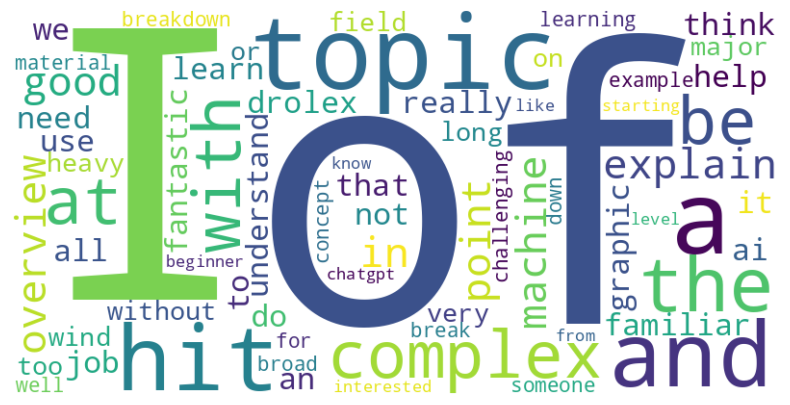

In [ ]:
# Create using all words, so set stopwords to the Null set
# Combine all cleaned text into one string for word cloud generation
all_text = " ".join(df_subset['cleaned_text'])

# Create a word cloud with all words
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=set()).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Removal of Stop Words

Stopwords are thohse that are not very helpful to our task.  In the word cloud above, words like "and" and "the" are not helpful.  Spacy comes with it's oown set of default stop words.  LLets re-process the data to create a column that does not have any stop words and then regenerate the word cloud.

In [ ]:
# Create a cleaning function removing stopwords
def clean_text_no_stopwords(text):
    # Handle NaN values
    if pd.isna(text):
        return ""
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Replace slashes with spaces for better tokenization
    text_cleaned = text_cleaned.replace('/', ' ')
    # Remove any remaining non-alphanumeric characters except spaces and hyphens
    text_cleaned = re.sub(r'[^A-Za-z0-9\s-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text without stopwords or punctuation
    cleaned_tokens = []
    for token in doc:
        # Lemmatize token
        lemma_token = token.lemma_
        if not token.is_stop:
            cleaned_tokens.append(lemma_token)

    return " ".join(cleaned_tokens)


# Apply and view the cleaned text column
df_subset['cleaned_text_no_stopwords'] = df_subset['positive_aspects'].apply(clean_text_no_stopwords)
df_subset

,DocID,positive_aspects,cleaned_text,cleaned_text_no_stopwords
0,1,The use of graphics really helped me understan...,the use of graphic really help I understand co...,use graphic help understand complex topic fami...
1,2,Dr.Olex did a fantastic job at explaining mach...,drolex do a fantastic job at explain machine l...,drolex fantastic job explain machine learn ai
2,3,I think it hit all the points we needed to hit...,I think it hit all the point we need to hit wi...,think hit point need hit long - wind heavy
3,4,Very good overview and hit on major topics in ...,very good overview and hit on major topic in f...,good overview hit major topic field machine le...
4,5,Broad overview of a complex topic with good ex...,broad overview of a complex topic with good ex...,broad overview complex topic good example brea...
5,6,Material broken down well for someone at a beg...,material break down well for someone at a begi...,material break beginner level
6,7,interested in topic and explained from a start...,interested in topic and explain from a startin...,interested topic explain starting point know l...


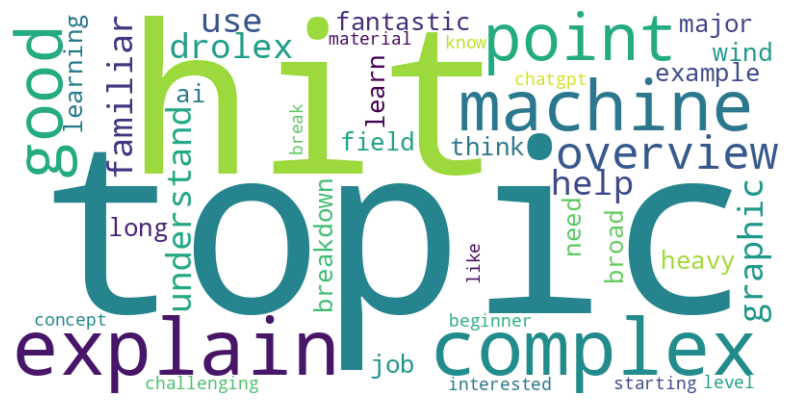

In [ ]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df_subset['cleaned_text_no_stopwords'])

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

### Custom Stopwords

The words "class" and "lecture" are not very helpful because these are class reviews, so we might want to add this as a stop word.

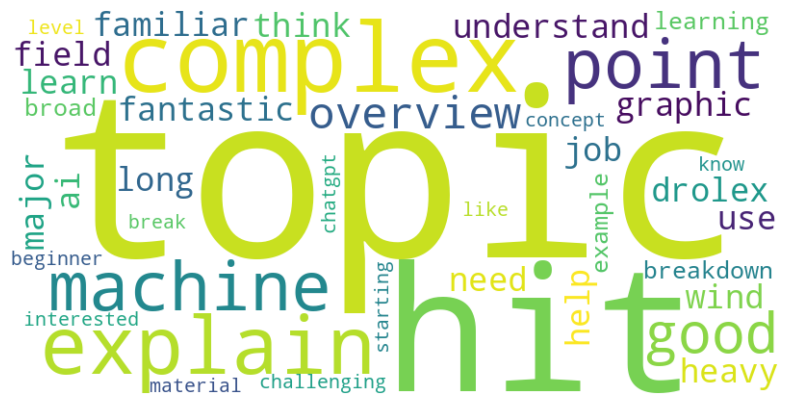

In [ ]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df_subset['cleaned_text_no_stopwords'])

STOP_WORDS = ['class', 'lecture']

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

# Part 5: On YOUR OWN

Can you copy and paste the blocks of code above to create a word cloud of the negative feedback?  You will need to 1) subset the df dataframe to use the negative_feedback column instead of the positive, 2) apply the data cleaning and stopword removal to the new subset dataframe, and 3) generate a word cloud image.

In [ ]:
## copy, paste and modify code to create a new subset df named "df_subset_neg" that contains the negative_feedback column instead of the positive.
df_subset_neg = df[['record_id','negative_aspects']].copy()
df_subset_neg.head()


,record_id,negative_aspects
0,1,The end of the lecture was a bit rushed.
1,2,I think I got kinda lost during the lecture an...
2,3,I do think we might have spent a little time t...
3,4,Delving more into the actual mathematics behin...
4,5,none


In [ ]:
## copy, paste, and modify the 2 commands that will add thhe clean_text and clean_text_no_stopwords columns to your dataframe.
## Note you do not need to copy the whole functions as they will still be loaded in memory.
## Just copy the 2 lines of code (hint: they are located iin different code cells.)

df_subset_neg['cleaned_text'] = df_subset_neg['negative_aspects'].apply(clean_text)
df_subset_neg['cleaned_text_no_stopwords'] = df_subset_neg['negative_aspects'].apply(clean_text_no_stopwords)
df_subset_neg

,record_id,negative_aspects,cleaned_text,cleaned_text_no_stopwords
0,1,The end of the lecture was a bit rushed.,the end of the lecture be a bit rush,end lecture bit rush
1,2,I think I got kinda lost during the lecture an...,I think I get kinda lose during the lecture an...,think get kinda lose lecture refound pretty ne...
2,3,I do think we might have spent a little time t...,I do think we might have spend a little time t...,think spend little time necessary basic ai thi...
3,4,Delving more into the actual mathematics behin...,delve more into the actual mathematic behind p...,delve actual mathematic pca sva type model int...
4,5,none,none,
5,6,NaN,,
6,7,the technical portions of the lecture were har...,the technical portion of the lecture be hard t...,technical portion lecture hard follow


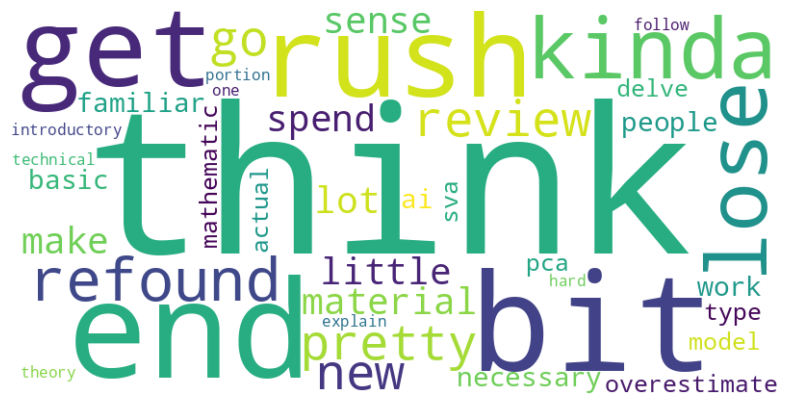

In [ ]:
## copy, paste and modify the code to generate the word cloud that does not contain stopwords.
## Are there any stopwords you need to add after viewing it?  Edit the code to make that happen.

# Create using default SpaCy stopwords
all_text_no_stopwords_neg = " ".join(df_subset_neg['cleaned_text_no_stopwords'].dropna()) # Added dropna() to handle missing values

STOP_WORDS_NEG = ['lecture', 'time'] # Added 'lecture' and 'time' as potential stopwords

# Create a word cloud with stopwords removed
wordcloud_no_stopwords_neg = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS_NEG).generate(all_text_no_stopwords_neg)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

# Part 6: SpaCy

Lets take a closer look at the SpaCy NLP command: doc = nlp(text_cleaned)

In [ ]:
## Create a Doc object to process the first positive feedback response in your dataset:
doc = nlp(df_subset['positive_aspects'][0])
doc

The use of graphics really helped me understand complex topics that I was not familiar with. 

### Get all annotations
When you just print out the doc as a string it prints your original text, but there is a lot of information packed in here!
The following functions use For loops to loop through each token in your input and extract out all the annotated data into a pandas dataframe.

In [ ]:
## Functions to extract all NLP annotations.

def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_,
         i.dep_, i.pos_, i.is_stop, i.is_alpha,
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs."""

    cols = [
        "doc_id", "token", "token_order", "lemma",
        "ent_type", "tag", "dep", "pos", "is_stop",
        "is_alpha", "is_digit", "is_punct"
    ]

    meta_df = []
    for ix, doc in enumerate(docs):

        if len(doc) > 0:
            meta = extract_tokens_plus_meta(doc)
            meta = pd.DataFrame(meta)
            meta.columns = cols[1:]
            #meta = meta.assign(doc_id = doc._.note_id).loc[:, cols]
            meta_df.append(meta)
        #else:
            #print("Excluding empty doc: " + str(doc._.note_id))
            #print(doc)

    return pd.concat(meta_df)


In [ ]:
tidy_doc = tidy_tokens([doc])
tidy_doc

,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,The,0,the,,DT,det,DET,True,True,False,False
1,use,1,use,,NN,nsubj,NOUN,False,True,False,False
2,of,2,of,,IN,prep,ADP,True,True,False,False
3,graphics,3,graphic,,NNS,pobj,NOUN,False,True,False,False
4,really,4,really,,RB,advmod,ADV,True,True,False,False
5,helped,5,help,,VBD,ROOT,VERB,False,True,False,False
6,me,6,I,,PRP,nsubj,PRON,True,True,False,False
7,understand,7,understand,,VB,ccomp,VERB,False,True,False,False
8,complex,8,complex,,JJ,amod,ADJ,False,True,False,False
9,topics,9,topic,,NNS,dobj,NOUN,False,True,False,False


### Get Lemma version your Doc

You can retireve the lemma version by using ".lemma_" with subsetting.  The ":" character mean "all tokens", or when used with numbers can mean 1 through 5 [1:5], 5 till the end [5:], or start to 5 [:5].  Try each of these out in the code block below.

In [ ]:
## Get the lemma version of the sentence or parts of it.
doc[:].lemma_

'the use of graphic really help I understand complex topic that I be not familiar with.'

### Other information needs to be looped over.
The next block of code is using an in-line for loop to extract out the non-stopwords and concatenate them back into a sentence with the "join" function.

In [ ]:
" ".join([token.lemma_ for token in doc if not token.is_stop])

'use graphic help understand complex topic familiar .'

In [ ]:
## now do the opposite by removing the word "not"
" ".join([token.lemma_ for token in doc if token.is_stop])

'the of really I that I be not with'

## Visualization

spaCy also has was to visualize the annotations.  Let visualize our feedback.  As we don't have any annotated entities in our data, we will visualize the dependencies.

In [ ]:
# Visualize the dependencies
displacy.render(doc, style="dep", jupyter=True)

# Part 7: Import ALL feedback and run the above in bulk

Most of this section is streamlined to import the merged dataset I have prepared for you and running a subset of the same cleaning routines to prepare the data for TopEx analysis.  NOTE: We do not remove stopwords or punctuation because TopEx does that for us, and we do not need to lower case either.  We DO remove all non-ascii charaters and filter out odd punctuation. For inputing a dataset to Topex, any columns that have missing values should be removed. This can be done using the command ".dropna()" as shown below.

In [ ]:
## import data file
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Import the DataFrame from the Excel file
# The file will be available in the Colab environment with the name it had on your local machine
file_path = list(uploaded.keys())[0] # Get the name of the uploaded file
df_redcap = pd.read_excel(file_path)

# Display the first few rows of the exported DataFrame
display(df_redcap.head())

Saving CCTR691_combined_redcap_data_2025 (1).xlsx to CCTR691_combined_redcap_data_2025 (1) (1).xlsx
User uploaded file "CCTR691_combined_redcap_data_2025 (1) (1).xlsx" with length 16750 bytes


,record_id,instructor,survey_date,course_module,prior_knowledge,instructor_eval,prep_eval,positive_aspects,negative_aspects,improvements,doc_id,lecture_topic
0,1,Dr. J. Chuck Harrell,2025-09-30,2,1,NaN,1.0,I really enjoyed the lab and thought learning ...,I wish we had been able to better analyze/get ...,NaN,Bayatpour_1,scRNASeq Applications
1,2,Dr. J. Chuck Harrell,2025-09-30,2,2,2.0,1.0,The lecture helped contextualize the use of sc...,The lecture focused too much on the instructor...,NaN,Bayatpour_2,scRNASeq Applications
2,3,Dr. J. Chuck Harrell,2025-09-30,2,3,1.0,NaN,It allowed me to learn the newer aspects of th...,It only taught how to create violin and t-SNE ...,Parameters used for generating UMAP/t-SNE plot...,Bayatpour_3,scRNASeq Applications
3,4,Dr. J. Chuck Harrell,2025-09-30,2,1,NaN,1.0,very good class,class was short.,NaN,Bayatpour_4,scRNASeq Applications
4,5,Dr. J. Chuck Harrell,2025-09-30,2,2,1.0,2.0,Even as someone who had used Loupe browser a d...,"No negative, it was great!",NaN,Bayatpour_5,scRNASeq Applications


In [ ]:
# Subset the DataFrame to keep only the positive feedback columns
df_topex = df_redcap[['doc_id','positive_aspects']].copy()
# We have NaN values this time, so lets remove them
df_topex.dropna(inplace=True)
df_topex.head()

,doc_id,positive_aspects
0,Bayatpour_1,I really enjoyed the lab and thought learning ...
1,Bayatpour_2,The lecture helped contextualize the use of sc...
2,Bayatpour_3,It allowed me to learn the newer aspects of th...
3,Bayatpour_4,very good class
4,Bayatpour_5,Even as someone who had used Loupe browser a d...


In [ ]:
# Create a cleaning function including stopwords
import re # Import the re module here

def clean_minimal(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)

    # Return the cleaned text
    return text_cleaned

In [ ]:
# Apply and view the cleaned text column
df_topex['Text'] = df_topex['positive_aspects'].apply(clean_minimal)
df_topex

,doc_id,positive_aspects,Text
0,Bayatpour_1,I really enjoyed the lab and thought learning ...,I really enjoyed the lab and thought learning ...
1,Bayatpour_2,The lecture helped contextualize the use of sc...,The lecture helped contextualize the use of sc...
2,Bayatpour_3,It allowed me to learn the newer aspects of th...,It allowed me to learn the newer aspects of th...
3,Bayatpour_4,very good class,very good class
4,Bayatpour_5,Even as someone who had used Loupe browser a d...,Even as someone who had used Loupe browser a d...
...,...,...,...
82,Safarians_9,didnt have class,didnt have class
83,Safarians_10,Great job covering many complex topics in a sh...,Great job covering many complex topics in a sh...
84,Safarians_11,Learned about so many aspects of data represen...,Learned about so many aspects of data represen...
85,Safarians_12,getting familiar with NLP and how it can impro...,getting familiar with NLP and how it can impro...


Save only the doc_id and Text columns to an Excel file for TopEx.

In [ ]:
# Save the data to a text file
df_topex[['doc_id','Text']].to_excel('top_ex_ready_data_2025.xlsx', index=False)

# Download the file
from google.colab import files
files.download('top_ex_ready_data_2025.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Part 8: TopEx Analysis

- Download the file you just created on Athena to your desktop.

- Go to [http://topex.cctr.vcu.edu/](http://topex.cctr.vcu.edu/)

- Using the hamburger menu on the left, click on the "From Excel File" option and upload this Excel file to the TopEx platform.

- Click "Run TopEx" button and see what you get without any parameter modifications.

- Answer the questions below...

## Question 1:
What are your observations of the default analysis?  Does it look useful?

Answer: There is no distinct clusters or patterns, and it does not look particularly useful

## Question 2:
Set the clustering method to Kmeans with Euclidean distance. Then play with the number of cluster, vectorization method, window size and visualization parameters.  Find a set that looks good to you and gives you some information.  Type those settings below and copy the scatter plot image and paste it below.  Also describe what type of cluster topics you found. For the image, you can take a screen shot and just paste it in from the clipboard.

Optimal Parameters: Number of clusters 5, window size 5, vectorization umap, dimensions 100, clustering kmeans, visualization umap, umap neighbors 15

Cluster Topic Summary:  The main clusters were delineated by umap 1 value, one cluster had an emphasis on 'structure', one focused on 'contexualizing' and 'complex' concepts, the last clusters are miscellaneous and difficult to categorize

Scatter Plot Image:
![image.png]()

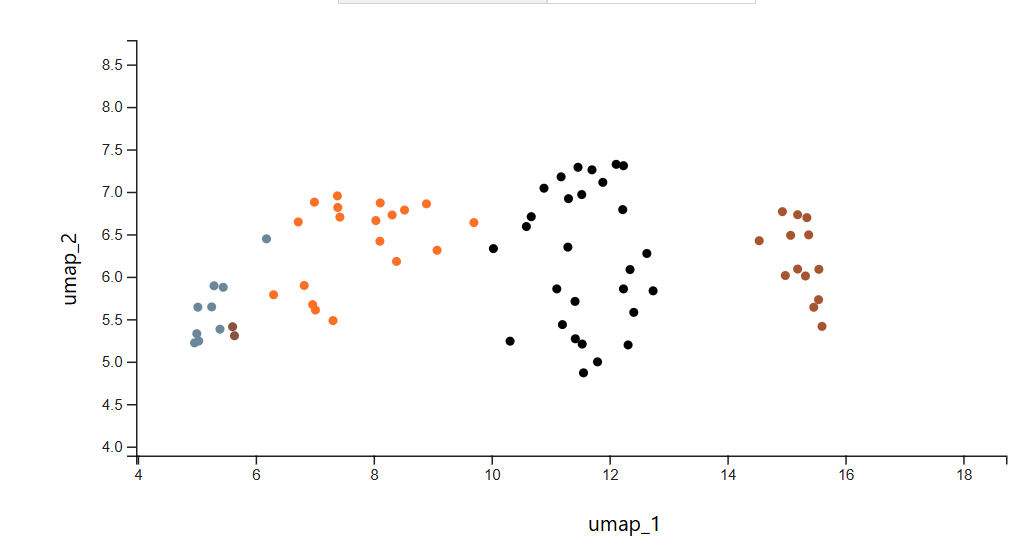



## Question 3:
Review the wordcloud plots.  are there any frequent words that are not helpful?  Pick a few and create a custom stopwords file. This is just a text file with one word per line, all lowercase.  Upload this file and rerun your analysis keeping all your optimal parameters.  How did this change your data?

Answer: My custom stopwords were topic, dr, and lot. The clusters did not group together as tightly and changed positions, plus there is one less cluster than before.

Scatter Plot Image: 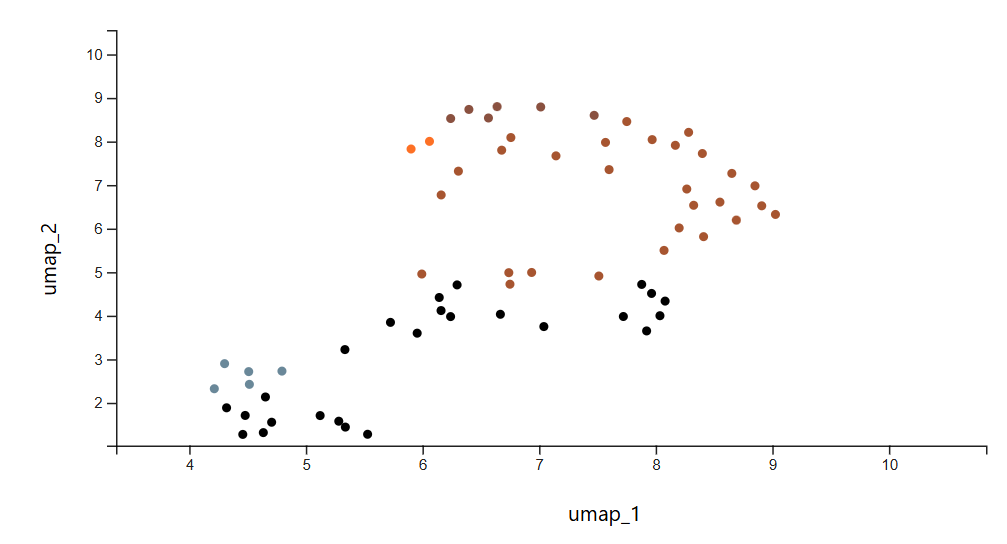

# Part 9: Creating a Topic Analysis using Gemini

For this part of the lab you will use Gemini in Collab to generate an NLP plan and execute the code one step at a time.  Then the Topic analysis will be visualized with pyLDAvis.  

## Steps:

 1) Run the install command below.
 2) Create a new CODE block, then open a Gemini window by clicking on "generate with AI" and type to following prompt:  "Develop a new lab exercise and write code to run a topic analysis on the positive_aspects column of the df_redcap dataframe. Explain each step, write a summary of the results and visualize them using pyLDAvis."

In [ ]:
## Before we begin, install the needed packages.

!pip install pyldavis -q

### 9.3 LDA Model Training

Now, we will train an LDA model using the `LatentDirichletAllocation` from scikit-learn. We will specify the number of topics we want the model to find.

### Part 9: Topic Analysis using Latent Dirichlet Allocation (LDA)

In this section, we will perform Topic Analysis on the positive feedback from the REDCap data using Latent Dirichlet Allocation (LDA) and visualize the results using pyLDAvis.

**Steps:**

1.  **Data Preparation:** Clean and preprocess the text data from the `positive_aspects` column.
2.  **Vectorization:** Convert the text data into a numerical format suitable for the LDA model using a CountVectorizer.
3.  **LDA Model Training:** Train the LDA model on the vectorized data to identify latent topics.
4.  **Visualization:** Use pyLDAvis to interactively visualize the identified topics and their associated terms.
5.  **Interpretation:** Summarize the topics found in the analysis.

### Part 9: Topic Analysis using Latent Dirichlet Allocation (LDA)

In this section, we will perform Topic Analysis on the positive feedback from the REDCap data using Latent Dirichlet Allocation (LDA) and visualize the results using pyLDAvis.

**Steps:**

1.  **Data Preparation:** Clean and preprocess the text data from the `positive_aspects` column.
2.  **Vectorization:** Convert the text data into a numerical format suitable for the LDA model using a CountVectorizer.
3.  **LDA Model Training:** Train the LDA model on the vectorized data to identify latent topics.
4.  **Visualization:** Use pyLDAvis to interactively visualize the identified topics and their associated terms.
5.  **Interpretation:** Summarize the topics found in the analysis.

### 9.1 Data Preparation

We will use the `clean_text_no_stopwords` function we defined earlier to preprocess the `positive_aspects` column. We will also handle any missing values by filling them with an empty string.

In [ ]:
# Fill any potential missing values in 'positive_aspects' with an empty string
df_redcap['positive_aspects'] = df_redcap['positive_aspects'].fillna('')

# Apply the cleaning function to the 'positive_aspects' column
df_redcap['cleaned_positive_aspects'] = df_redcap['positive_aspects'].apply(clean_text_no_stopwords)

# Display the cleaned data
display(df_redcap[['positive_aspects', 'cleaned_positive_aspects']].head())

,positive_aspects,cleaned_positive_aspects
0,I really enjoyed the lab and thought learning ...,enjoy lab think learn use software helpful
1,The lecture helped contextualize the use of sc...,lecture help contextualize use scrnaseq cancer...
2,It allowed me to learn the newer aspects of th...,allow learn new aspect loupe browser - past wo...
3,very good class,good class
4,Even as someone who had used Loupe browser a d...,loupe browser decent learn lot lecture rate ex...


### 9.2 Vectorization

Next, we will convert the cleaned text data into a matrix of token counts using `CountVectorizer`. This is a common way to represent text data for topic modeling.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# You can adjust parameters like max_df, min_df, and stop_words to fine-tune the vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned text data
dtm = vectorizer.fit_transform(df_redcap['cleaned_positive_aspects'])

# Get the feature names (words)
tf_feature_names = vectorizer.get_feature_names_out()

print("Shape of the document-term matrix:", dtm.shape)

Shape of the document-term matrix: (87, 121)


### 9.3 LDA Model Training

Now, we will train an LDA model using the `LatentDirichletAllocation` from scikit-learn. We will specify the number of topics we want the model to find.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize and train the LDA model
# You can adjust the number of components (n_components) to find more or fewer topics
n_topics = 5 # You can change this number
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm)

print(f"LDA model trained with {n_topics} topics.")

LDA model trained with 5 topics.


### 9.4 Visualization with pyLDAvis

We will use pyLDAvis to create an interactive visualization of the topics. This visualization helps in understanding the relationship between topics and the most relevant terms within each topic.

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model

# Prepare the visualization data
vis = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer, mds='tsne')

# Display the visualization
pyLDAvis.display(vis)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 9.5 Topic Interpretation

Based on the pyLDAvis visualization and the terms associated with each topic, describe the main themes or topics found in the positive feedback.

The main themes and topics in the positive feedback include the material was interesting and useful, the lectures were explained well and accessible, and the content was complex.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Appendix: Kaggle Dataset Analysis

This appendix contains code to analyze a Harvard reviews Kaggle dataset.  This data has more information in it, so you will get a more interesting TopEx analysis.  In addition, these reviews are in multiple languages, so we utilize a new package to detect the language and filter it to only those that are English.


In [ ]:
!pip install langdetect

from langdetect import detect
import kagglehub

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=2aa333bcae0b77fe26995955be32150101632ba26d352995c140409c2f8a7d99
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

KeyboardInterrupt: 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Importing and Looking at our Data:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kanchana1990/harvard-university-ratings-and-reviews")

print("Path to dataset files:", path)

In [ ]:
#Load data from a csv file into a pandas DataFrame
file_path = path+'/harvard_reviews.csv'  # create the full file path
df = pd.read_csv(file_path) # you can instead use the command "pd.read_excel()" for .xlsx files

#Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

In [ ]:
## create a unique index for our data
#Create a new column with a unique ID for each row
df["Doc_ID"] = 'Doc_' + df.index.astype(str)
df.tail()

### Language Detection

We can detect any non-English text and remove it from the analysis using the command "detect" from the library "langdetect".

In [ ]:
# Check for any non-English text and remove it
# First add a new column to the dataset with the detected language
df['language'] = df['text'].apply(lambda x: detect(x) if pd.notnull(x) else 'unknown')

# Identify the distribution of languages and plot them
language_counts = df['language'].value_counts()
print("\nLanguage Distribution in Text:\n", language_counts)

# Finally, keep on the data rows that are English
df = df[df['language'] == 'en']  # Keep only English rows
df

### Clean the text and Word Cloud Viz

Next, we can generate a word cloud from the remaining data to visualize frequency of major themes using the function "WordCloud()". We can generate one without stopwords and and one with them. We can check the list of stopwords included by default in spaCy using "print(nlp.Defaults.stop_words)".
WordCloud removes stopwords by default, therefore to disable this feature we need to add "stopwords=set()" as a parameter.

In [ ]:

# Create a cleaning function including stopwords
def clean_text(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text
    return " ".join([token.lemma_ for token in doc])# if not token.is_punct])

# Create a cleaning function removing stopwords
def clean_text_no_stopwords(text):
    # Remove non-ASCII characters (keep only standard English characters)
    text_ascii = text.encode('ascii', 'ignore').decode('ascii')
    # Remove extra spaces and lowercase
    text_cleaned = text_ascii.strip().lower()
    # Remove any remaining non-alphanumeric characters
    text_cleaned = re.sub(r'[^A-Za-z0-9\s.,!?\'\"-]', '', text_cleaned)
    # Process the cleaned text through spaCy for lemmatization and stopword removal
    doc = nlp(text_cleaned)
    # Return the lemmatized text without stopwords or punctuation
    return " ".join([token.lemma_ for token in doc if not token.is_stop])# and not token.is_punct])

# Apply and view the cleaned text column
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text_no_stopwords'] = df['text'].apply(clean_text_no_stopwords)
df[['text', 'cleaned_text','cleaned_text_no_stopwords']].head()

In [ ]:
# Create using all words, so set stopwords to the Null set
# Combine all cleaned text into one string for word cloud generation
all_text = " ".join(df['cleaned_text'])

# Create a word cloud with all words
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=set()).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create using default SpaCy stopwords
all_text_no_stopwords = " ".join(df['cleaned_text_no_stopwords'])

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=set()).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create using default stop words PLUS custom stop words
all_text_no_stopwords = " ".join(df['cleaned_text_no_stopwords'])

STOP_WORDS = ['harvard', 'university', 'campus','tour','student']

# Create a word cloud with stopwords removed
wordcloud_no_stopwords = WordCloud(width=800, height=400, background_color='white', stopwords=STOP_WORDS).generate(all_text_no_stopwords)

# Display the word cloud without stopwords
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

## Prep Harvard Dataset for TopEx

In [ ]:
# Subset the DataFrame to keep only specific columns and remove NA values
df_subset = df[['Doc_ID', 'text']]

# Drop NA values
df_subset.dropna(inplace=True)

# Rename column
df_subset.rename(columns={'text': 'Text'}, inplace=True)

# Export the DataFrame to an Excel file
# Note we are only exporting a subset of the data because TopEx was crashing on the full dataset as the online server is small.
file_name = 'top_ex_ready_data_Harvard.xlsx'
df_subset[0:800].to_excel(file_name, index=False)

# Download the file
from google.colab import files
files.download(file_name)

## TopEx Analysis

Import into TopEx and explore as before!

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# You can adjust parameters like max_df, min_df, and stop_words to fine-tune the vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned text data
dtm = vectorizer.fit_transform(df_redcap['cleaned_positive_aspects'])

# Get the feature names (words)
tf_feature_names = vectorizer.get_feature_names_out()

print("Shape of the document-term matrix:", dtm.shape)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize and train the LDA model
# You can adjust the number of components (n_components) to find more or fewer topics
n_topics = 5 # You can change this number
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm)

print(f"LDA model trained with {n_topics} topics.")